In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install quandl
import quandl

SyntaxError: invalid syntax (2687374066.py, line 1)

In [ ]:
df = pd.read_csv('GOOG.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,04-01-2012,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,05-01-2012,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,06-01-2012,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,09-01-2012,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2960,09-10-2023,137.990005,139.970001,136.699997,139.500000,139.500000,16599100
2961,10-10-2023,139.509995,140.740005,138.429993,139.199997,139.199997,19554900
2962,11-10-2023,139.850006,142.220001,139.839996,141.699997,141.699997,20146300
2963,12-10-2023,142.160004,142.380005,139.449997,140.289993,140.289993,18173100


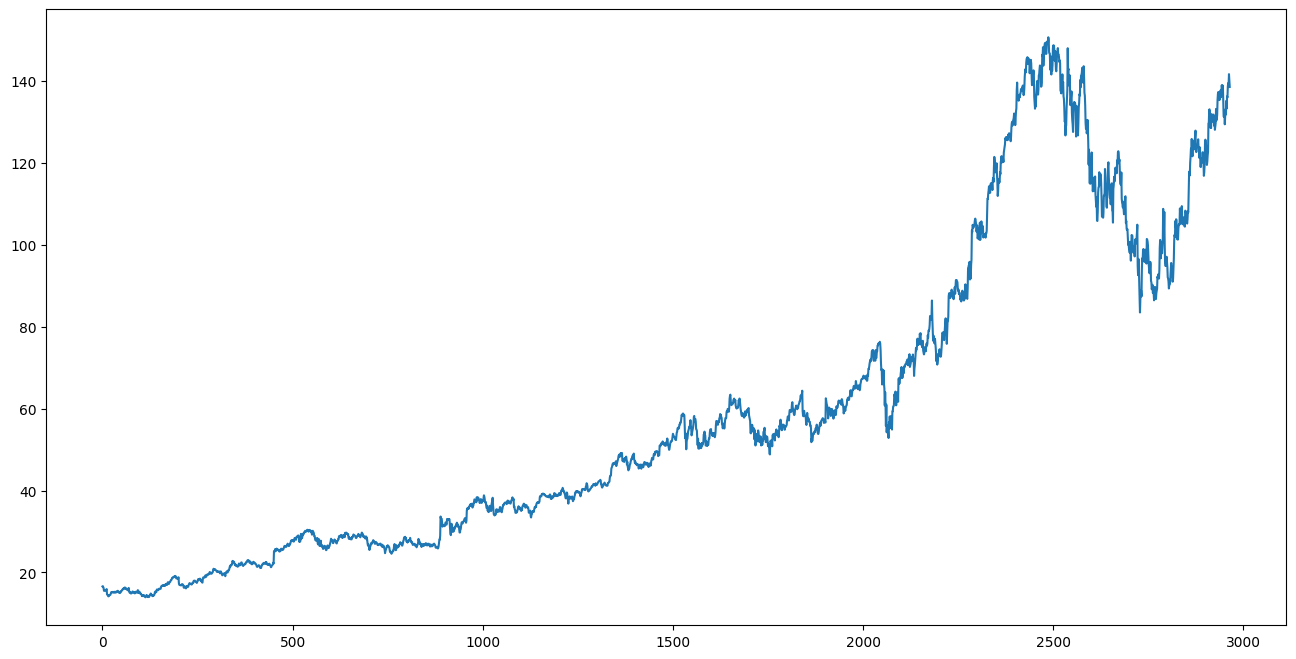

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label = 'Closing Price')

Classification problem : Buy (+1) or sell (-1) the stock

In [ ]:
df['Open - Close'] = df['Open'] - df['Close']
df['High - Low'] = df['High'] - df['Low']
df = df.dropna()

Input Festures to Predict wheather customer should Buy or Sell the Stock.

In [ ]:
X = df[['Open - Close', 'High - Low']]
X.head()

,Open - Close,High - Low
0,-0.310585,0.393029
1,-0.080946,0.239851
2,0.077709,0.192778
3,0.227396,0.254297
4,0.598755,0.641845


Intention is to share +1 for buy signal and -1 for the sell signal. The target Varialble is "Y"for the classification test.

In [ ]:
Y= np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [ ]:
Y

array([ 1, -1, -1, ..., -1, -1, -1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 44)

Implementation KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using  gridsearch to find the best parameter
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

# fit the model
model.fit(X_train, y_train)

# Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.60
Test_data Accuracy: 0.47


In [ ]:
predictions_classification = model.predict(X_test)

In [ ]:
actual_predicted_data = pd.DataFrame({'Actual Class': y_test, 'Predicted Class':predictions_classification})

In [ ]:
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,1,-1
1,-1,1
2,1,-1
3,1,-1
4,-1,-1
5,1,1
6,-1,-1
7,1,-1
8,-1,-1
9,1,-1


Regression Problem : KNN

In [ ]:
y = df['Close']

In [ ]:
y

0        16.573130
1        16.644611
2        16.413727
3        16.189817
4        15.503389
           ...    
2960    139.500000
2961    139.199997
2962    141.699997
2963    140.289993
2964    138.580002
Name: Close, Length: 2965, dtype: float64

Implementation of KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25, random_state=44)

#using GridSearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

#fit the model and make the predictions
model_reg.fit(X_train_reg,y_train_reg)
predictions = model_reg.predict(X_test_reg)

In [ ]:
print(predictions)

[ 57.57069187 100.98096653  53.27479913  73.611       86.141333
  35.3606888   24.5958508   93.71486667  29.62355553  49.03766667
  40.6184776   19.17548407  34.79906113  38.7750466   79.71023373
  37.65782527  37.19449233  33.3788792   50.88046647  27.44096093
  46.0920406   46.17325653  61.16476673  36.15458933  26.83773267
  39.21868313  41.87033287 110.4892662   70.94872293  62.471567
  36.96087393  45.39686787  93.29076773  33.63882673  27.85062447
  24.16231373  42.1126742   50.19850693  41.9401032   88.0145932
  90.87323393  89.06193287  94.54320173  88.3336338   92.47896673
  57.2704324   53.00593333  24.32453833  91.8151658  103.67030033
  84.01690033  71.8887926   81.36836627  27.6618484   77.335466
  21.7437476   27.28688973  36.92510573 101.99830127  33.1225148
 103.02206473  30.96404453  58.5172666   37.6953186   27.87094807
  52.2280002   33.91548407 111.96699873  63.6509674   26.44899167
  42.39311147  20.52969287  23.5601788   38.64014987  61.04523367
  79.61736553  36.

In [ ]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(predictions)),2)))
rms

67.64158448341568

In [ ]:
valid = pd.DataFrame({'Actual Close':y_test_reg,'Predicted Close value':predictions})

In [ ]:
valid.head(10)

,Actual Close,Predicted Close value
2155,75.016998,57.570692
2737,98.989998,100.980967
933,31.462500,53.274799
2166,75.331001,73.611000
1706,55.504002,86.141333
878,26.091999,35.360689
654,28.316257,24.595851
2173,79.021004,93.714867
1445,47.955502,29.623556
1520,56.489498,49.037667


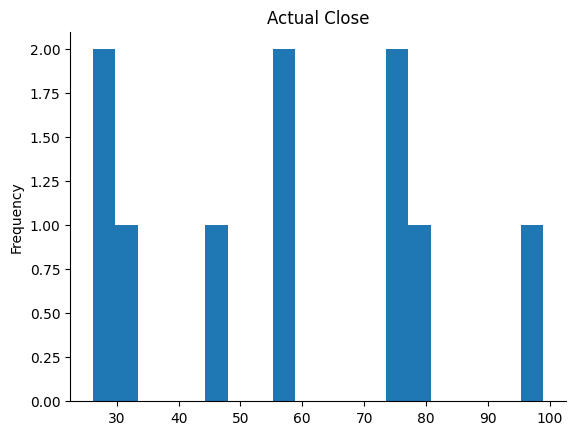

In [ ]:
_df_0['Actual Close'].plot(kind='hist', bins=20, title='Actual Close')
gca().spines[['top', 'right',]].set_visible(False)

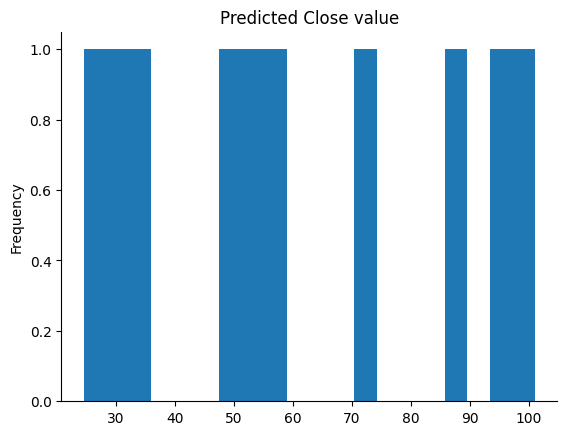

In [ ]:
from matplotlib import pyplot as plt
_df_1['Predicted Close value'].plot(kind='hist', bins=20, title='Predicted Close value')
gca().spines[['top', 'right',]].set_visible(False)

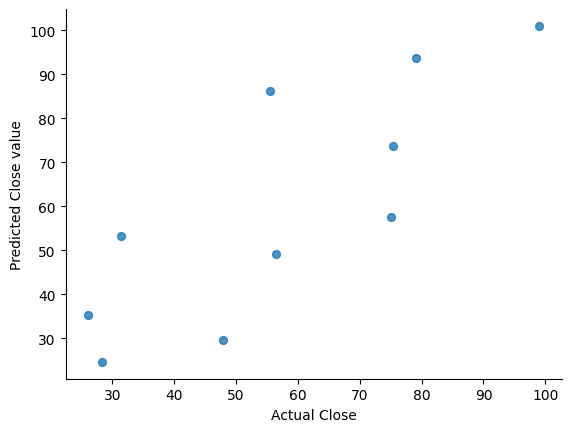

In [ ]:
from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Actual Close', y='Predicted Close value', s=32, alpha=.8)
gca().spines[['top', 'right',]].set_visible(False)

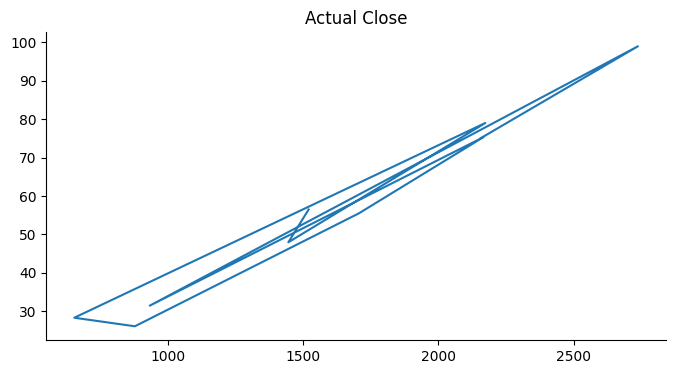

In [ ]:
from matplotlib import pyplot as plt
_df_3['Actual Close'].plot(kind='line', figsize=(8, 4), title='Actual Close')
gca().spines[['top', 'right']].set_visible(False)

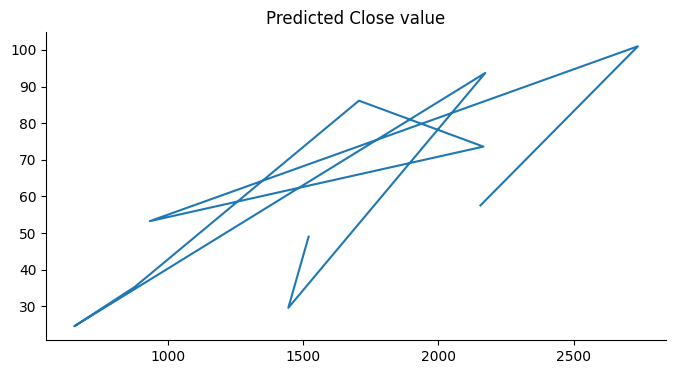

In [ ]:
from matplotlib import pyplot as plt
_df_4['Predicted Close value'].plot(kind='line', figsize=(8, 4), title='Predicted Close value')
gca().spines[['top', 'right']].set_visible(False)